In [192]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
  
use1 = pd.read_excel('qwe/USE1.xlsx')
use1 = pd.DataFrame(use1)
print('loaded')
# use2 = pd.read_excel('qwe/USE2.xlsx')
# use2 = pd.DataFrame(use2)
# print('loaded')
use3 = pd.read_excel('qwe/USE3.xlsx')
use3 = pd.DataFrame(use3)
print('loaded')
use4 = pd.read_excel('qwe/USE4.xlsx')
use4 = pd.DataFrame(use4)
print('loaded')
use5 = pd.read_excel('qwe/USE5.xlsx')
use5 = pd.DataFrame(use5)
print('loaded')
use6 = pd.read_excel('qwe/USE6.xlsx')
use6 = pd.DataFrame(use6)
print('loaded')
use7 = pd.read_excel('qwe/USE7.xlsx')
use7 = pd.DataFrame(use7)
print('loaded')
use8 = pd.read_excel('qwe/USE8.xlsx')
use8 = pd.DataFrame(use8)
print('loaded')

columns_to_keep_use = ['IncidentDate', 'Borough', 'SubjectAge', 'SubjectGender', 'SubjectEthnicity', 'PrimaryConduct', 
                   'AssaultedBySubject', 'Impact Factor: Possesion of a weapon', 
                   'Impact Factor: Mental Health', 'Impact Factor: Crowd', 
                   'Reason for Force: Prevent Offence', 'Reason for Force: Secure Evidence', 
                   'Reason for Force: Effect Stop and search', 'Reason for Force: Effect Arrest', 
                   'SubjectInjured', 'Outcome: Hospitalised', 'Outcome: Fatality']

use1 = use1[columns_to_keep_use]
# use2 = use2[columns_to_keep_use]
use3 = use3[columns_to_keep_use]
use4 = use4[columns_to_keep_use]
use5 = use5[columns_to_keep_use]
use6 = use6[columns_to_keep_use]
use7 = use7[columns_to_keep_use]
use8 = use8[columns_to_keep_use]

use = use1 + use3 + use4 + use5 + use6 + use7 + use8

use.head(100)

loaded
loaded
loaded
loaded
loaded
loaded
loaded


KeyError: "['Reason for Force: Effect Stop and search'] not in index"

In [142]:
gran = pd.read_excel('qwe/Gran.xlsx', sheet_name='Borough')
gran = gran.drop(columns=['Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8'])

measure_list = list(gran['Measure'].unique())

for measure in measure_list:
    temp = gran[gran['Measure'] == measure]
    gran[measure] = temp['Proportion']

gran = gran.drop('Measure', axis=1)
gran = gran.drop('Proportion', axis=1)
gran = gran.drop('MPS', axis=1)

gran['Borough'] = gran['Borough'].replace(['Richmond Upon Thames'], ['Richmond upon Thames'])

gran = gran.groupby(['Date', 'Borough']).max().reset_index()
gran = gran.drop('Trust MPS', axis=1)

gran['Average Score'] = gran.loc[:, '"Good Job" local':'Understand issues'].mean(axis=1)
gran['Average Score'] = gran['Average Score'].round(4)
gran['Rank'] = gran.groupby('Date')['Average Score'].rank("dense", ascending=False)

gran.head()

,Date,Borough,"""Good Job"" local",Contact ward officer,Informed local,Listen to concerns,Relied on to be there,Treat everyone fairly,Understand issues,Average Score,Rank
0,2014-12-31,Barking and Dagenham,0.56,0.36,0.44,0.69,0.67,0.71,0.63,0.5800,27.0
1,2014-12-31,Barnet,0.67,0.38,0.46,0.73,0.75,0.74,0.73,0.6371,20.0
2,2014-12-31,Bexley,0.72,0.36,0.52,0.78,0.78,0.78,0.77,0.6729,7.0
3,2014-12-31,Brent,0.66,0.36,0.41,0.78,0.78,0.76,0.77,0.6457,17.0
4,2014-12-31,Bromley,0.71,0.41,0.56,0.76,0.71,0.66,0.71,0.6457,17.0


In [143]:
# Can't get the fucking group-by-week to work because I'm retarded
gran['Date'] = pd.to_datetime(gran['Date']) - pd.to_timedelta(7, unit = 'd')
gran = gran.groupby(['Borough', pd.Grouper(key = 'Date', freq = 'W-MON')])[['"Good Job" local', 
                            'Contact ward officer', 'Informed local', 'Listen to concerns', 
                            'Relied on to be there', 'Treat everyone fairly', 'Understand issues', 
                            'Average Score']].sum().reset_index().sort_values('Date')

In [144]:
gran.head(100)

,Borough,Date,"""Good Job"" local",Contact ward officer,Informed local,Listen to concerns,Relied on to be there,Treat everyone fairly,Understand issues,Average Score
0,Barking and Dagenham,2014-12-29,0.56,0.36,0.44,0.69,0.67,0.71,0.63,0.5800
37,Barnet,2014-12-29,0.67,0.38,0.46,0.73,0.75,0.74,0.73,0.6371
888,Newham,2014-12-29,0.55,0.43,0.58,0.66,0.74,0.72,0.62,0.6143
851,Merton,2014-12-29,0.72,0.42,0.55,0.72,0.77,0.73,0.71,0.6600
814,Lewisham,2014-12-29,0.62,0.49,0.50,0.68,0.74,0.65,0.62,0.6143
...,...,...,...,...,...,...,...,...,...,...
39,Barnet,2015-06-29,0.66,0.39,0.44,0.73,0.77,0.79,0.68,0.6371
151,Bromley,2015-09-28,0.73,0.42,0.53,0.72,0.76,0.77,0.66,0.6557
336,Enfield,2015-09-28,0.59,0.44,0.36,0.63,0.68,0.71,0.60,0.5729
410,Hackney,2015-09-28,0.65,0.50,0.44,0.75,0.78,0.63,0.74,0.6414


In [145]:
use1.head()

,IncidentDate,Borough,SubjectAge,SubjectGender,SubjectEthnicity,PrimaryConduct,AssaultedBySubject,Impact Factor: Possesion of a weapon,Impact Factor: Mental Health,Impact Factor: Crowd,Reason for Force: Prevent Offence,Reason for Force: Secure Evidence,Reason for Force: Effect Stop and search,Reason for Force: Effect Arrest,SubjectInjured,Outcome: Hospitalised,Outcome: Fatality
0,2024-04-01,Waltham Forest,35-49,Male,Black (or Black British),Compliant,No,No,No,No,Yes,Yes,Yes,No,No,No,No
1,2024-04-01,Croydon,18-34,Male,Black (or Black British),Active resistance,No,No,No,No,Yes,No,No,Yes,No,No,No
2,2024-04-01,Harrow,18-34,Female,White,Compliant,No,No,No,No,No,Yes,Yes,Yes,No,No,No
3,2024-04-01,Barking and Dagenham,35-49,Male,White,Verbal resistance/gestures,No,No,No,No,Yes,No,No,Yes,No,No,No
4,2024-04-01,Camden,11-17,Female,Black (or Black British),Compliant,No,No,No,No,Yes,No,No,No,No,No,No


In [178]:
unique_boroughs = use1['Borough'].unique()
rate_uof_per = {}

for borough in unique_boroughs:
    borough_df = use1[use1['Borough'] == borough]

    count_uof_compliant = borough_df['PrimaryConduct'].value_counts()['Compliant']
    rate_uof_compliant = count_uof_compliant/len(borough_df)

    rate_uof_per[borough] = rate_uof_compliant.round(3)    

rate_uof_vstrust = pd.DataFrame(list(rate_uof_per.items()), columns=['Borough', 'Rate of compliant uof cases'])

gran_avg_trust = []
for borough in rate_uof_vstrust['Borough']:
    sum = gran[gran["Borough"] == borough]['Average Score'].sum()
    avg = sum/len(gran[gran['Borough'] == borough])
    gran_avg_trust.append(avg)

rate_uof_vstrust['Trust'] = gran_avg_trust
rate_uof_vstrust = rate_uof_vstrust.dropna(subset=['Trust']).reset_index(drop = 'True')

C:\Users\arthu\AppData\Local\Temp\ipykernel_21196\498779093.py:17: RuntimeWarning: invalid value encountered in scalar divide
  avg = sum/len(gran[gran['Borough'] == borough])


In [179]:
rate_uof_vstrust

,Borough,Rate of compliant uof cases,Trust
0,Waltham Forest,0.406,0.531927
1,Croydon,0.375,0.528186
2,Harrow,0.397,0.582238
3,Barking and Dagenham,0.358,0.568259
4,Camden,0.285,0.565989
5,Tower Hamlets,0.408,0.556519
6,City of Westminster,0.237,0.612314
7,Southwark,0.248,0.564051
8,Barnet,0.305,0.584281
9,Bromley,0.271,0.590386


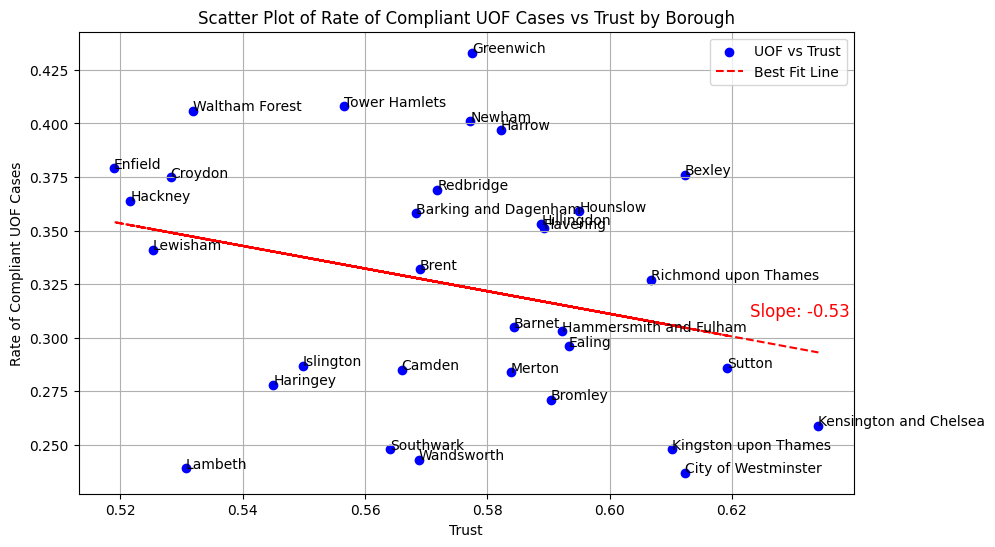

In [180]:
plt.figure(figsize=(10, 6))
plt.scatter(rate_uof_vstrust['Trust'], rate_uof_vstrust['Rate of compliant uof cases'], c='blue', label='UOF vs Trust')

for i, borough in enumerate(rate_uof_vstrust['Borough']):
    plt.text(rate_uof_vstrust['Trust'][i], rate_uof_vstrust['Rate of compliant uof cases'][i], borough)

plt.xlabel('Trust')
plt.ylabel('Rate of Compliant UOF Cases')
plt.title('Scatter Plot of Rate of Compliant UOF Cases vs Trust by Borough')

z = np.polyfit(rate_uof_vstrust['Trust'], rate_uof_vstrust['Rate of compliant uof cases'], 1)
p = np.poly1d(z)
plt.plot(rate_uof_vstrust['Trust'], p(rate_uof_vstrust['Trust']), "r--", label='Best Fit Line')

slope = z[0]
plt.text(0.623, 0.31, f'Slope: {slope:.2f}', fontsize=12, color='red')

plt.legend()
plt.grid(True)
plt.show()

In [185]:
uof_crowds = pd.DataFrame(unique_boroughs, columns = ['Borough'])

rate_uof_crowd = []
for borough in unique_boroughs:
    borough_df = use1[use1['Borough'] == borough]

    crowd_tot = borough_df['Impact Factor: Crowd'].value_counts()['Yes']
    crowd_rate = crowd_tot/len(borough_df)

    rate_uof_crowd.append(crowd_rate)    

uof_crowds['Crowd rate'] = rate_uof_crowd

uof_crowds['Trust'] = gran_avg_trust
uof_crowds = uof_crowds.dropna(subset = ['Trust']).reset_index(drop = True)

uof_crowds

,Borough,Crowd rate,Trust
0,Waltham Forest,0.093750,0.531927
1,Croydon,0.115702,0.528186
2,Harrow,0.114504,0.582238
3,Barking and Dagenham,0.147727,0.568259
4,Camden,0.148148,0.565989
5,Tower Hamlets,0.122905,0.556519
6,City of Westminster,0.207407,0.612314
7,Southwark,0.194357,0.564051
8,Barnet,0.064171,0.584281
9,Bromley,0.054299,0.590386


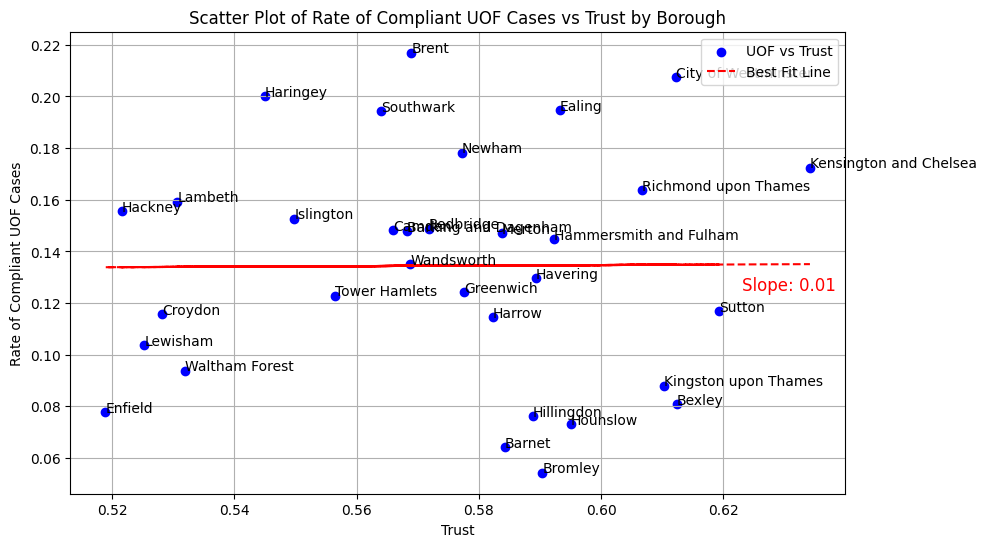

In [188]:
plt.figure(figsize=(10, 6))
plt.scatter(uof_crowds['Trust'], uof_crowds['Crowd rate'], c='blue', label='UOF vs Trust')

for i, borough in enumerate(uof_crowds['Borough']):
    plt.text(uof_crowds['Trust'][i], uof_crowds['Crowd rate'][i], borough)

plt.xlabel('Trust')
plt.ylabel('Rate of Compliant UOF Cases')
plt.title('Scatter Plot of Rate of Compliant UOF Cases vs Trust by Borough')

z = np.polyfit(uof_crowds['Trust'], uof_crowds['Crowd rate'], 1)
p = np.poly1d(z)
plt.plot(uof_crowds['Trust'], p(uof_crowds['Trust']), "r--", label='Best Fit Line')

slope = z[0]
plt.text(0.623, 0.125, f'Slope: {slope:.2f}', fontsize=12, color='red')

plt.legend()
plt.grid(True)
plt.show()